# MissingValuesAnalysis
AIM: Apportare una riduzione significativa nel numero di missing values confrontando di volta in volta le distribuzioni dei valori , pre e dopo il trattamento, anche raggruppate per sottocategorie dove ritenuto necessario.

In [74]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from collections import defaultdict
from scipy.stats.stats import pearsonr

df = pd.read_csv('Training_DistributionStatistic.csv')
dfold = df

# Check dello stato del dataset

In [75]:
df.isnull().sum()  

RefId                                    0
IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Engine                               19582
Trim                                  1793
Transmission                             8
WheelTypeID                           2577
VehOdo                                   0
Nationality                              4
Size                                     4
TopThreeAmericanName                     4
MMRAcquisitionAuctionAveragePrice       13
MMRAcquisitionAuctionCleanPrice         13
MMRAcquisitionRetailAveragePrice        13
MMRAcquisitonRetailCleanPrice           13
MMRCurrentAuctionAveragePrice          245
MMRCurrentAuctionCleanPrice            245
MMRCurrentRetailAveragePrice           245
MMRCurrentRetailCleanPrice             245
BYRNO      

In [76]:
(df == 0).sum(axis=0)

RefId                                    0
IsBadBuy                             51178
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               1
Make                                     0
Engine                                   0
Trim                                     0
Transmission                             0
WheelTypeID                              0
VehOdo                                   0
Nationality                              0
Size                                     0
TopThreeAmericanName                     0
MMRAcquisitionAuctionAveragePrice      648
MMRAcquisitionAuctionCleanPrice        552
MMRAcquisitionRetailAveragePrice       648
MMRAcquisitonRetailCleanPrice          648
MMRCurrentAuctionAveragePrice          393
MMRCurrentAuctionCleanPrice            300
MMRCurrentRetailAveragePrice           393
MMRCurrentRetailCleanPrice             393
BYRNO      

In [77]:
(df == 1).sum(axis=0)

RefId                                    1
IsBadBuy                              7208
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                            2509
Make                                     0
Engine                                   0
Trim                                     0
Transmission                             0
WheelTypeID                          28735
VehOdo                                   0
Nationality                              0
Size                                     0
TopThreeAmericanName                     0
MMRAcquisitionAuctionAveragePrice        0
MMRAcquisitionAuctionCleanPrice         96
MMRAcquisitionRetailAveragePrice         0
MMRAcquisitonRetailCleanPrice            0
MMRCurrentAuctionAveragePrice            0
MMRCurrentAuctionCleanPrice             93
MMRCurrentRetailAveragePrice             0
MMRCurrentRetailCleanPrice               0
BYRNO      

# riempimento e analisi Missing Values per Attributi Categorici

** - SubModel **

In [78]:
Variable="SubModel"
#Sostituzione dei valori nulli del submodel utilizzando la moda raggruppata per modello e anno del veicolo
df[Variable] = df['SubModel'].groupby([df['Model'], df['VehYear']]).fillna(df[Variable].mode()[0])
df[Variable].isnull().sum()

0

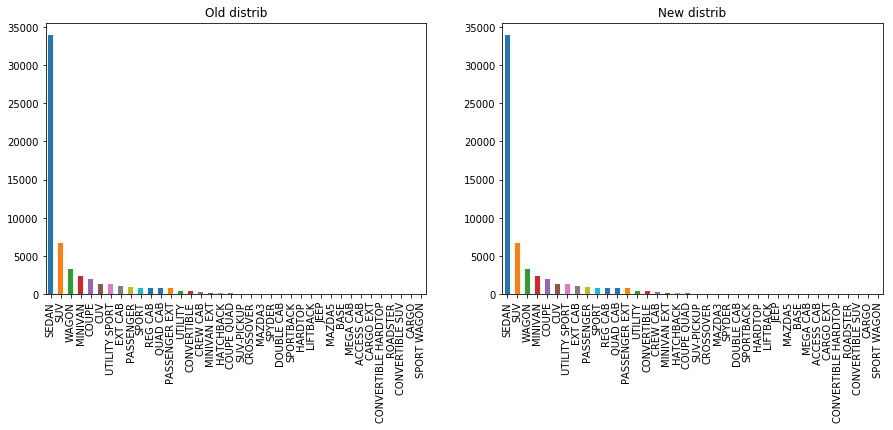

In [79]:
# dopo ogni sostituzione poi verifichiamo se e come la distribuzione si è modificata

# Set up a grid of plots
fig = plt.figure(figsize=(15, 5)) 
fig_dims = (1, 2)

# Plot old Distribution
plt.subplot2grid(fig_dims, (0, 0))
dfold[Variable].value_counts().plot(kind="bar", title='Old distrib')

# Plot new Distribution
plt.subplot2grid(fig_dims, (0, 1))
df[Variable].value_counts().plot(kind="bar", title='New distrib')

plt.show()

** - Trim **

c'è un aumento della categoria bas

In [80]:
Variable='Trim'
#Sostituzione dei valori nulli del trim utilizzando la moda raggruppata per modello sottomodello e anno
df[Variable] = df[Variable].groupby([df['Model'], df['SubModel'], df['VehYear']]).fillna(df[Variable].mode()[0])
df[Variable].isnull().sum()

0

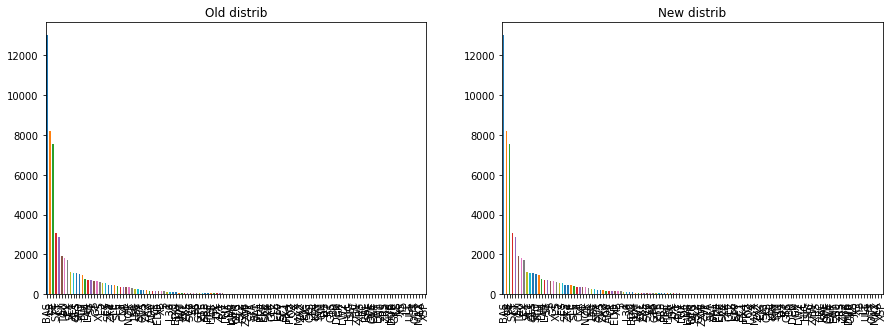

In [81]:
# Set up a grid of plots
fig = plt.figure(figsize=(15, 5)) 
fig_dims = (1, 2)

# Plot old Distribution
plt.subplot2grid(fig_dims, (0, 0))
dfold[Variable].value_counts().plot(kind="bar", title='Old distrib')

# Plot new Distribution
plt.subplot2grid(fig_dims, (0, 1))
df[Variable].value_counts().plot(kind="bar", title='New distrib')

plt.show()

** - Transmission **

In [82]:
Variable='Transmission'
#Sostituzione dei valori nulli della trasmissione utilizzando la moda raggruppata per modello sottomodello e anno
df[Variable] = df[Variable].groupby([df['Model'], df['SubModel'], df['VehYear']]).fillna(df[Variable].mode()[0])
df[Variable].isnull().sum()

0

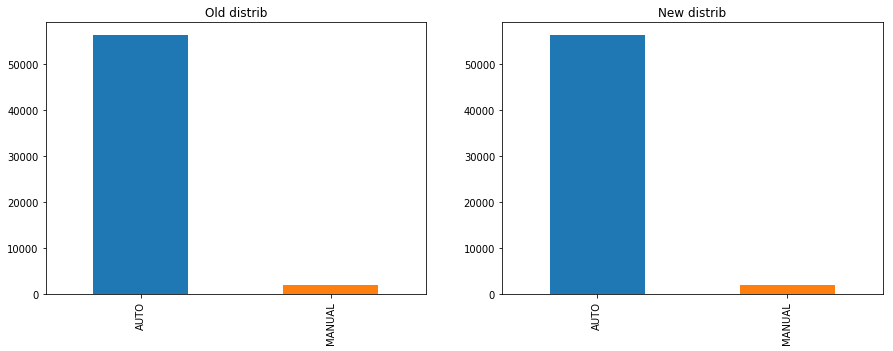

In [83]:
# Set up a grid of plots
fig = plt.figure(figsize=(15, 5)) 
fig_dims = (1, 2)

# Plot old Distribution
plt.subplot2grid(fig_dims, (0, 0))
dfold[Variable].value_counts().plot(kind="bar", title='Old distrib')

# Plot new Distribution
plt.subplot2grid(fig_dims, (0, 1))
df[Variable].value_counts().plot(kind="bar", title='New distrib')

plt.show()

** - WheelTypeID **

In [84]:
Variable='WheelTypeID'
#Sostituzione dei valori nulli del wheeltypeID utilizzando la moda raggruppata per modello sottomodello e Trim
df[Variable] = df[Variable].groupby([df['Model'], df['SubModel'], df['Trim']]).fillna(df[Variable].mode()[0])
df[Variable].isnull().sum()

0

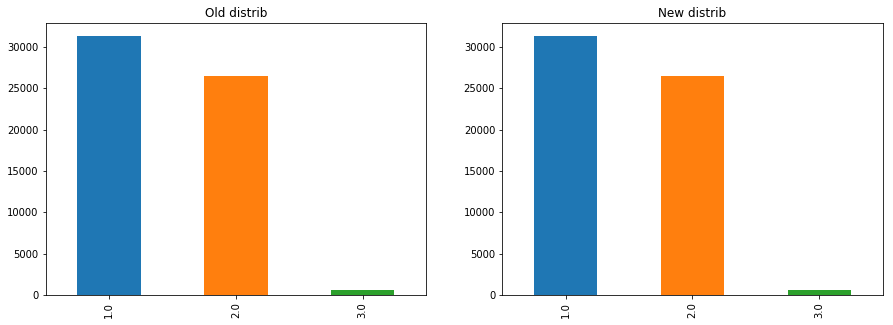

In [85]:
# Set up a grid of plots
fig = plt.figure(figsize=(15, 5)) 
fig_dims = (1, 2)

# Plot old Distribution
plt.subplot2grid(fig_dims, (0, 0))
dfold[Variable].value_counts().plot(kind="bar", title='Old distrib')

# Plot new Distribution
plt.subplot2grid(fig_dims, (0, 1))
df[Variable].value_counts().plot(kind="bar", title='New distrib')

plt.show()

** - Nationality **

In [86]:
Variable='Nationality'
#Sostituzione dei valori nulli di Nationality utilizzando la moda raggruppata per make
df[Variable] = df[Variable].groupby([df['Make']]).fillna(df[Variable].mode()[0])
df[Variable].isnull().sum()

0

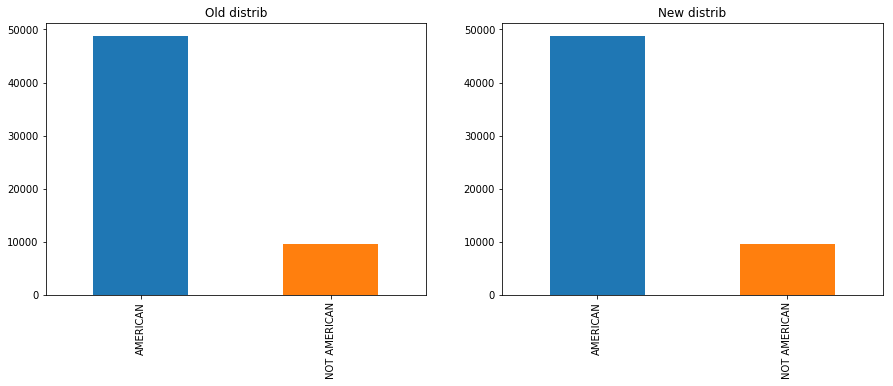

In [87]:
# Set up a grid of plots
fig = plt.figure(figsize=(15, 5)) 
fig_dims = (1, 2)

# Plot old Distribution
plt.subplot2grid(fig_dims, (0, 0))
dfold[Variable].value_counts().plot(kind="bar", title='Old distrib')

# Plot new Distribution
plt.subplot2grid(fig_dims, (0, 1))
df[Variable].value_counts().plot(kind="bar", title='New distrib')

plt.show()

** - Size **

In [88]:
Variable='Size'
#Sostituzione dei valori nulli di Size utilizzando la moda raggruppata per modello sottomodello e anno
df[Variable] = df[Variable].groupby([df['Model'], df['SubModel'], df['VehYear']]).fillna(df[Variable].mode()[0])
df[Variable].isnull().sum()

0

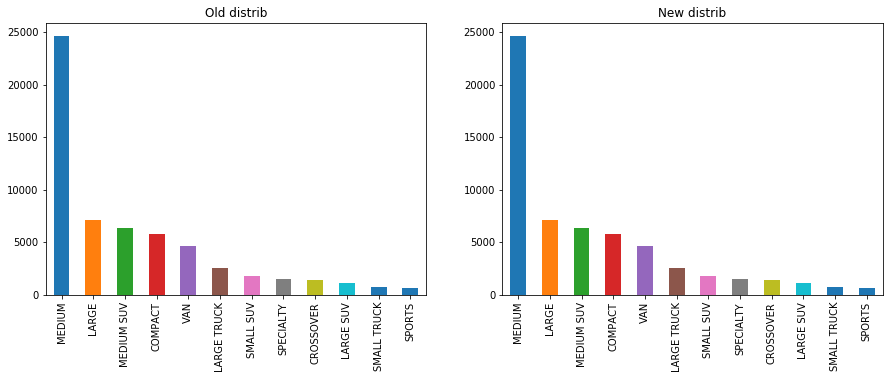

In [89]:
# Set up a grid of plots
fig = plt.figure(figsize=(15, 5)) 
fig_dims = (1, 2)

# Plot old Distribution
plt.subplot2grid(fig_dims, (0, 0))
dfold[Variable].value_counts().plot(kind="bar", title='Old distrib')

# Plot new Distribution
plt.subplot2grid(fig_dims, (0, 1))
df[Variable].value_counts().plot(kind="bar", title='New distrib')

plt.show()

** - TopThreeAmericanName **

In [90]:
Variable='TopThreeAmericanName'
#Sostituzione dei valori nulli di TopThreeAmericanName utilizzando la moda raggruppata per modello sottomodello e Trim
df[Variable] = df[Variable].groupby([df['Make']]).fillna(df[Variable].mode()[0])
df[Variable].isnull().sum()

0

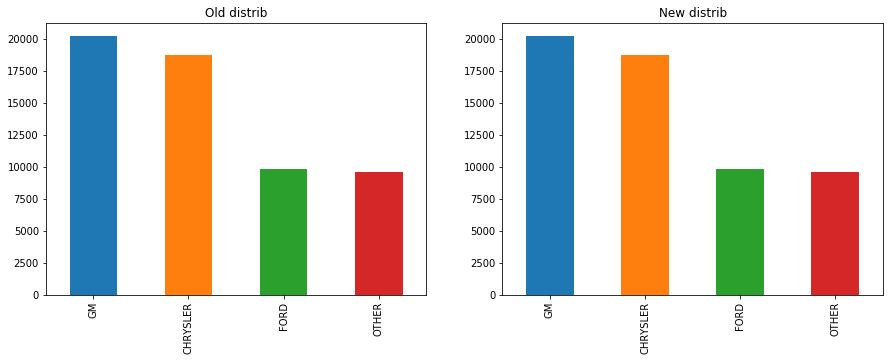

In [91]:
# Set up a grid of plots
fig = plt.figure(figsize=(15, 5)) 
fig_dims = (1, 2)

# Plot old Distribution
plt.subplot2grid(fig_dims, (0, 0))
dfold[Variable].value_counts().plot(kind="bar", title='Old distrib')

# Plot new Distribution
plt.subplot2grid(fig_dims, (0, 1))
df[Variable].value_counts().plot(kind="bar", title='New distrib')

plt.show()

# riempimento e analisi missing values per Attributi Numerici

I valori a 1 e a 0 sono stati interpretati come missing values <br>
I valori mancanti sono stati riempiti utilizzando la mediana di raggruppamenti appositamente studiati <br>
I valori sono stati riempiti solo se il valore della varianza dello specifico MMR nel raggruppamento non superava un determinato valore

In [92]:
# Funzione univoca per il riempimento dei missing values:
# se la varianza per ciascun raggruppamento è minore di 250000 (o è un valore nullo perchè non c'è un numero di oggetti 
# abbastanza elevato per calcolarla) sostituisco i valori nulli con la mediana del raggruppamento.
# altrimenti non si sostituisce nulla (si filla con null: np.nan)
def fun_temp(x):
    if x.var() == np.nan or x.var() < 250000:
        return x.fillna(x.median())
    return x.fillna(np.nan)

In [93]:
#Definizione numero di bins
binsN = math.ceil(math.log(df.shape[0],2))+1

** - MMRAcquisitionAuctionAveragePrice ** <br>
valori nulli pre-modifica=661 <br>
valori nulli post-modifica=606

In [94]:
Variable='MMRAcquisitionAuctionAveragePrice'

In [95]:
# consideriamo i valori uguali a 0 come valori nulli. quindi sostituiamo 0 con null (np.nan)

df[Variable].replace(0, np.nan, inplace=True)
df[Variable].isnull().sum()

661

In [96]:
# filliamo i valori nulli di 'MMRAcquisitionAuctionAveragePrice' con la mediana di ciascun raggruppamento degli attributi:
# anno di acquisto, modello, sottomodello, anno del veicolo
df[Variable] = df[Variable].groupby([df['PurchDate'], df['Model'], df['SubModel'], df['VehYear']]).apply(fun_temp)
df[Variable].isnull().sum()

606

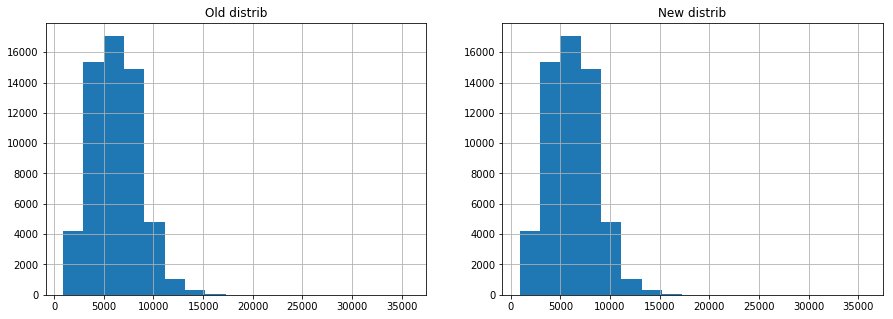

In [97]:
#Modifica a dfold per rendere equiparabili i grafici
dfold[Variable].replace(0, np.nan, inplace=True)

# Set up a grid of plots
fig = plt.figure(figsize=(15, 5)) 
fig_dims = (1, 2)

# Plot old Distribution
plt.subplot2grid(fig_dims, (0, 0), title='Old distrib')
dfold[Variable].hist(bins=binsN)

# Plot new Distribution
plt.subplot2grid(fig_dims, (0, 1), title='New distrib')
df[Variable].hist(bins=binsN)

plt.show()

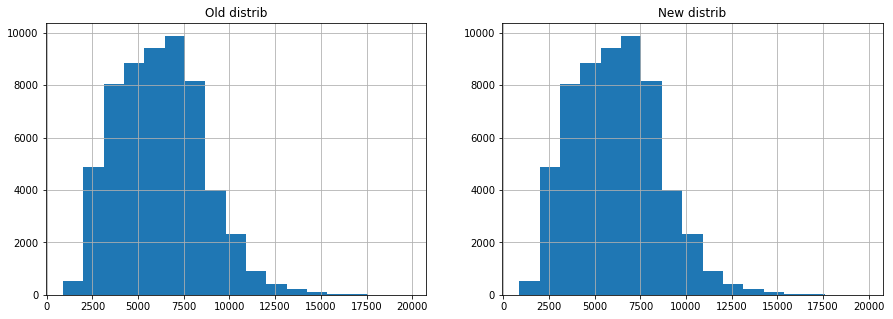

In [98]:
#Focus on the most important part of the distribution

# Set up a grid of plots
fig = plt.figure(figsize=(15, 5)) 
fig_dims = (1, 2)

newSize = df[df[Variable]<20000][Variable].count()
binsSpecific = math.ceil(math.log(newSize,2))+1

# Plot old Distribution
plt.subplot2grid(fig_dims, (0, 0), title='Old distrib')
dfold[dfold[Variable]<20000][Variable].hist(bins=binsSpecific)

# Plot new Distribution
plt.subplot2grid(fig_dims, (0, 1), title='New distrib')
df[df[Variable]<20000][Variable].hist(bins=binsSpecific)

plt.show()

** - MMRAcquisitionAuctionCleanPrice ** <br>
valori nulli pre-modifica=661 <br>
valori nulli post-modifica=607

In [99]:
# facciamo la stessa cosa per tutte le variabili numeriche
Variable='MMRAcquisitionAuctionCleanPrice'

In [100]:
df[Variable].replace(0, np.nan, inplace=True)
df[Variable].replace(1, np.nan, inplace=True)  # oltre a 0 consideriamo valori nulli anche i valori pari a 1
df[Variable].isnull().sum()

661

In [101]:
df[Variable] = df[Variable].groupby([df['PurchDate'], df['Model'], df['SubModel'], df['VehYear']]).apply(fun_temp)
df[Variable].isnull().sum()

607

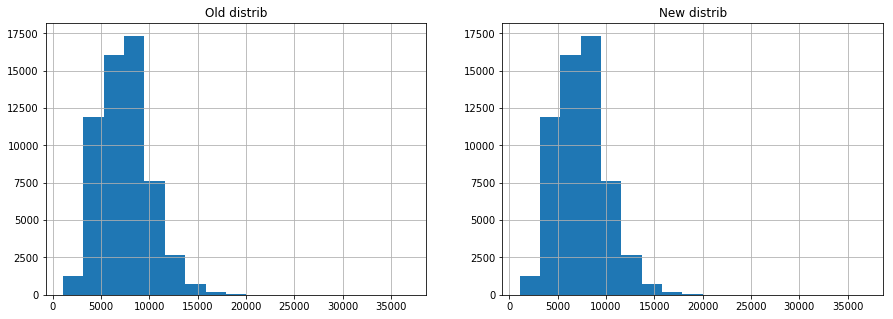

In [102]:
#Modifica a dfold per rendere equiparabili i grafici
dfold[Variable].replace(0, np.nan, inplace=True)

# Set up a grid of plots
fig = plt.figure(figsize=(15, 5)) 
fig_dims = (1, 2)

# Plot old Distribution
plt.subplot2grid(fig_dims, (0, 0), title='Old distrib')
dfold[Variable].hist(bins=binsN)

# Plot new Distribution
plt.subplot2grid(fig_dims, (0, 1), title='New distrib')
df[Variable].hist(bins=binsN)

plt.show()

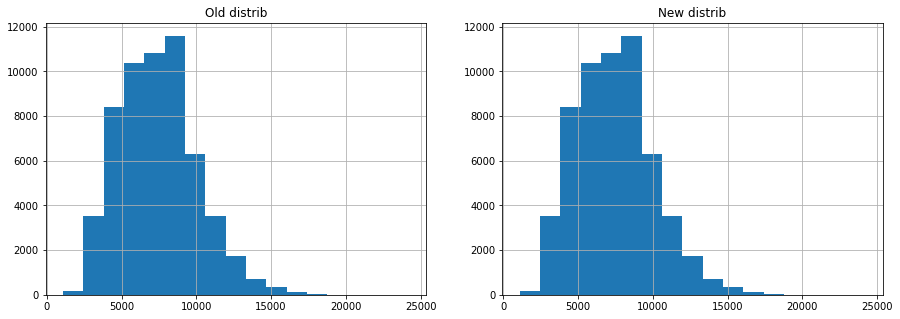

In [103]:
#Focus on the most important part of the distribution

# Set up a grid of plots
fig = plt.figure(figsize=(15, 5)) 
fig_dims = (1, 2)

newSize = df[df[Variable]<20000][Variable].count()
binsSpecific = math.ceil(math.log(newSize,2))+1

# Plot old Distribution
plt.subplot2grid(fig_dims, (0, 0), title='Old distrib')
dfold[dfold[Variable]<25000][Variable].hist(bins=binsSpecific)

# Plot new Distribution
plt.subplot2grid(fig_dims, (0, 1), title='New distrib')
df[df[Variable]<25000][Variable].hist(bins=binsSpecific)

plt.show()

** - MMRAcquisitionRetailAveragePrice ** <br>
valori nulli pre-modifica=661 <br>
valori nulli post-modifica=600

In [104]:
Variable='MMRAcquisitionRetailAveragePrice'

In [105]:
df[Variable].replace(0, np.nan, inplace=True)
df[Variable].isnull().sum()

661

In [106]:
df[Variable] = df[Variable].groupby([df['PurchDate'], df['Model'], df['SubModel'], df['VehYear']]).apply(fun_temp)
df[Variable].isnull().sum()

606

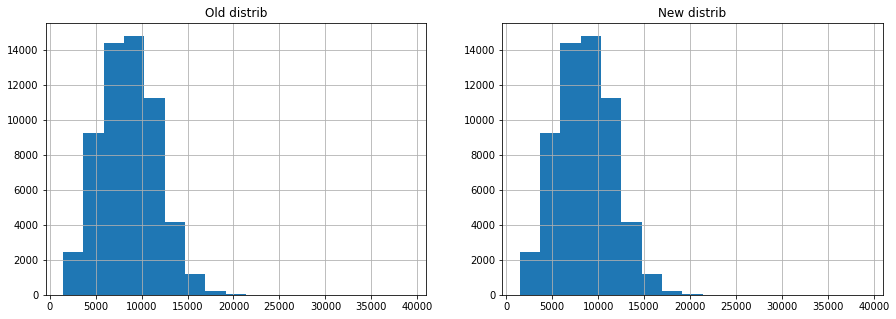

In [107]:
#Modifica a dfold per rendere equiparabili i grafici
dfold[Variable].replace(0, np.nan, inplace=True)

# Set up a grid of plots
fig = plt.figure(figsize=(15, 5)) 
fig_dims = (1, 2)

# Plot old Distribution
plt.subplot2grid(fig_dims, (0, 0), title='Old distrib')
dfold[Variable].hist(bins=binsN)

# Plot new Distribution
plt.subplot2grid(fig_dims, (0, 1), title='New distrib')
df[Variable].hist(bins=binsN)

plt.show()

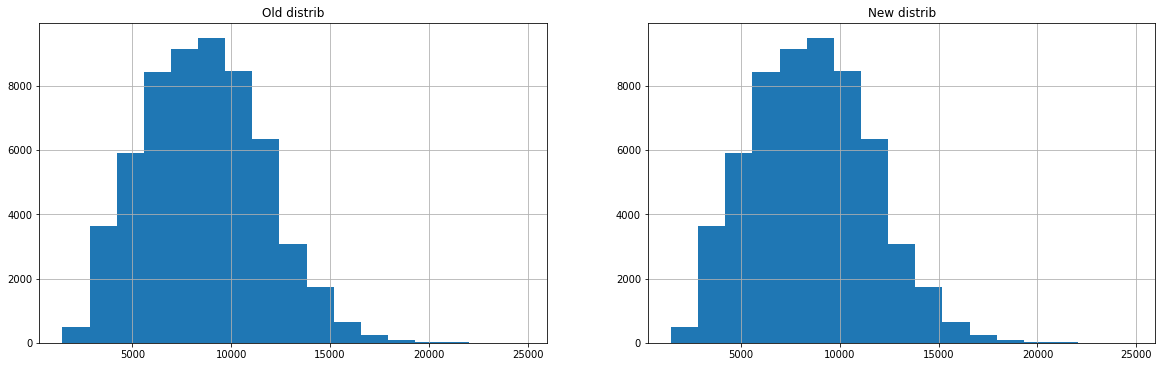

In [108]:
#Focus on the most important part of the distribution

# Set up a grid of plots
fig = plt.figure(figsize=(20, 20)) 
fig_dims = (3, 2)

newSize = df[df[Variable]<20000][Variable].count()
binsSpecific = math.ceil(math.log(newSize,2))+1

# Plot old Distribution
plt.subplot2grid(fig_dims, (0, 0), title='Old distrib')
dfold[dfold[Variable]<25000][Variable].hist(bins=binsSpecific)

# Plot new Distribution
plt.subplot2grid(fig_dims, (0, 1), title='New distrib')
df[df[Variable]<25000][Variable].hist(bins=binsSpecific)

plt.show()

** - MMRAcquisitionRetailCleanPrice** <br>
valori nulli pre-modifica=661 <br>
valori nulli post-modifica=608

In [109]:
Variable='MMRAcquisitonRetailCleanPrice'

In [110]:
df[Variable].replace(0, np.nan, inplace=True)
df[Variable].isnull().sum()

661

In [111]:
df[Variable] = df[Variable].groupby([df['PurchDate'], df['Model'], df['SubModel'], df['VehYear']]).apply(fun_temp)
df[Variable].isnull().sum()

608

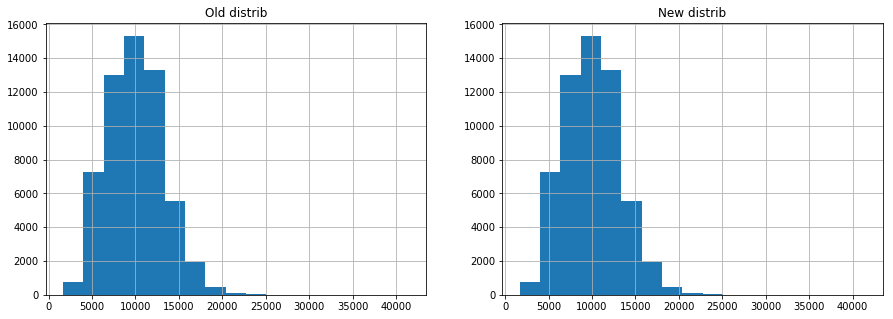

In [112]:
#Modifica a dfold per rendere equiparabili i grafici
dfold[Variable].replace(0, np.nan, inplace=True)

# Set up a grid of plots
fig = plt.figure(figsize=(15, 5)) 
fig_dims = (1, 2)

# Plot old Distribution
plt.subplot2grid(fig_dims, (0, 0), title='Old distrib')
dfold[Variable].hist(bins=binsN)

# Plot new Distribution
plt.subplot2grid(fig_dims, (0, 1), title='New distrib')
df[Variable].hist(bins=binsN)

plt.show()

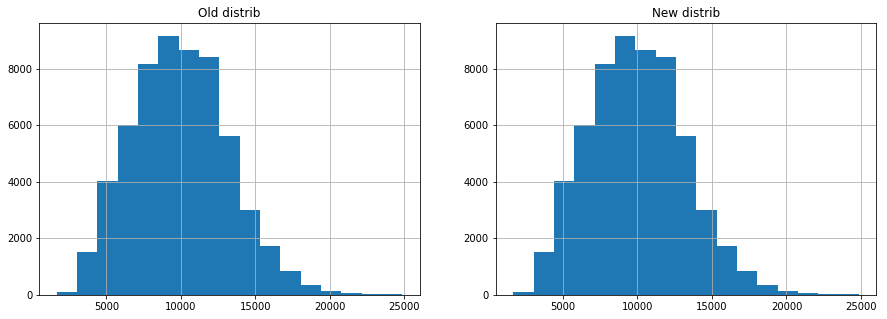

In [113]:
#Focus on the most important part of the distribution

# Set up a grid of plots
fig = plt.figure(figsize=(15, 5)) 
fig_dims = (1, 2)

newSize = df[df[Variable]<25000][Variable].count()
binsSpecific = math.ceil(math.log(newSize,2))+1

# Plot old Distribution
plt.subplot2grid(fig_dims, (0, 0), title='Old distrib')
dfold[dfold[Variable]<25000][Variable].hist(bins=binsSpecific)

# Plot new Distribution
plt.subplot2grid(fig_dims, (0, 1), title='New distrib')
df[df[Variable]<25000][Variable].hist(bins=binsSpecific)

plt.show()

# controllo missing values rimanenti tra gli attributi numerici

Gli elementi nulli degli MMR alla data 'corrente' non possono essere riempiti perchè sono associati a una varianza troppo
alta dovuta all'impossibilità di determinare il giorno corretto in cui l'MMR è stato calcolato, pertanto sono state rimosse tutte le righe che presentavano dei missing value. <br>
Sono stati inoltre eliminate anche le righe degli MMR calcolato al tempo dell'asta per cui la funzione di riempimento restituiva un valore null (dovuto o alla varianza elevata o alla presenza di un una combinazione di data modello sottomodello e anno in cui erano presenti solo elementi con MMR nullo)

trasformiamo nuovamente i valori uguali a 0 o 1 in valori nulli per verificare quanti missing value sono rimasti

In [114]:
Variable='MMRCurrentAuctionAveragePrice'
df[Variable].replace(0, np.nan, inplace=True)
df[Variable].replace(1, np.nan, inplace=True)

In [115]:
Variable='MMRCurrentAuctionCleanPrice'
df[Variable].replace(0, np.nan, inplace=True)
df[Variable].replace(1, np.nan, inplace=True)

In [116]:
Variable='MMRCurrentRetailAveragePrice'
df[Variable].replace(0, np.nan, inplace=True)
df[Variable].replace(1, np.nan, inplace=True)

In [117]:
Variable='MMRCurrentRetailCleanPrice'
df[Variable].replace(0, np.nan, inplace=True)
df[Variable].replace(1, np.nan, inplace=True)

In [118]:
#Controllo dello stato dei missing value
df.isnull().sum()  

RefId                                    0
IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Engine                               19582
Trim                                     0
Transmission                             0
WheelTypeID                              0
VehOdo                                   0
Nationality                              0
Size                                     0
TopThreeAmericanName                     0
MMRAcquisitionAuctionAveragePrice      606
MMRAcquisitionAuctionCleanPrice        607
MMRAcquisitionRetailAveragePrice       606
MMRAcquisitonRetailCleanPrice          608
MMRCurrentAuctionAveragePrice          638
MMRCurrentAuctionCleanPrice            638
MMRCurrentRetailAveragePrice           638
MMRCurrentRetailCleanPrice             638
BYRNO      

con il codice qui sotto notiamo che i valori nulli dei due gruppi di attributi:
[MMRAcquisitionAuctionAveragePrice, MMRAcquisitionAuctionCleanPrice, MMRAcquisitionRetailAveragePrice, MMRAcquisitonRetailCleanPrice] e [MMRCurrentAuctionAveragePrice, MMRCurrentAuctionCleanPrice, MMRCurrentRetailAveragePrice, MMRCurrentRetailCleanPrice], sono rispettivamente gli stessi (tranne che per poche eccezioni del primo gruppo).

quindi basta eliminare gli oggetti che hanno missing values in due variabili rappresentative dei due gruppi. es: MMRAcquisitionAuctionAveragePrice e MMRCurrentAuctionAveragePrice (più MMRAcquisitonRetailCleanPrice per le poche eccezioni).

ed in questo modo abbiamo già eliminato tutti gli oggetti con missing values.

In [119]:
dig1 = set(df[df['MMRAcquisitionAuctionAveragePrice'].isnull()]['RefId'])
dig2 = set(df[df['MMRAcquisitionAuctionCleanPrice'].isnull()]['RefId'])
dig3 = set(df[df['MMRAcquisitionRetailAveragePrice'].isnull()]['RefId'])
dig4 = set(df[df['MMRAcquisitonRetailCleanPrice'].isnull()]['RefId'])
dig5 = set(df[df['MMRCurrentAuctionAveragePrice'].isnull()]['RefId'])
dig6 = set(df[df['MMRCurrentAuctionCleanPrice'].isnull()]['RefId'])
dig7 = set(df[df['MMRCurrentRetailAveragePrice'].isnull()]['RefId'])
dig8 = set(df[df['MMRCurrentRetailCleanPrice'].isnull()]['RefId'])

In [120]:
len(dig1.intersection(dig2,dig3,dig4))

606

In [121]:
len(dig5.intersection(dig6,dig7,dig8))

638

In [122]:
len(dig1.intersection(dig5))

354

eliminazione degli oggetti

In [123]:
df = df.dropna(subset=['MMRAcquisitionAuctionAveragePrice'])
df['MMRAcquisitionAuctionAveragePrice'].isnull().sum()

0

In [124]:
df = df.dropna(subset=['MMRCurrentAuctionAveragePrice'])
df['MMRCurrentAuctionAveragePrice'].isnull().sum()

0

In [125]:
df = df.dropna(subset=['MMRAcquisitonRetailCleanPrice'])
df['MMRAcquisitonRetailCleanPrice'].isnull().sum()

0

In [126]:
df.isnull().sum()  

RefId                                    0
IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Engine                               19402
Trim                                     0
Transmission                             0
WheelTypeID                              0
VehOdo                                   0
Nationality                              0
Size                                     0
TopThreeAmericanName                     0
MMRAcquisitionAuctionAveragePrice        0
MMRAcquisitionAuctionCleanPrice          0
MMRAcquisitionRetailAveragePrice         0
MMRAcquisitonRetailCleanPrice            0
MMRCurrentAuctionAveragePrice            0
MMRCurrentAuctionCleanPrice              0
MMRCurrentRetailAveragePrice             0
MMRCurrentRetailCleanPrice               0
BYRNO      

** - Creazione DataSet Coerente **

L'MMR è il prezzo stiamato (medio) di una categoria specifica di veicolo (un certo Sottomodello con un certo numero di anni di vita) in un determinato momento (all'acquisto all'asta). Quindi eseguendo un raggruppamento del dataset per [PurchDate, Model, SubModel, VehYear] i valori dell'MMR in ogni gruppo dovrebbero essere praticamente uguali (perchè si tratta di veicoli praticamente identici). Notiamo però che per più di 7000 oggetti (transazioni) questa relazione non vale: abbiamo raggruppato il dataset per gli attributi suddetti e abbiamo calcolato la Varianza di ciascuna categorizzazione, che abbiamo preso come indicatore del fatto che alcune categorie specifiche di veicoli potrebbero avere valori dell'MMR non coerenti, perchè molto distanti tra loro quando invece dovrebbero essere uguali. Abbaimo notato che per alcuni gruppi, contenenti in totale più di 7000 oggetti, la varianza supera 250000, che abbiamo stabilito essere il nostro threshold massimo di tolleranza. Abbiamo deciso dunque di eliminare tutti gli oggetti che rientrano in tali raggruppamenti perchè non sono coerenti col significato di MMR ed il dataset deve essere ridotto in ogni caso. Facciamo ciò per gli attributi 'MMRAcquisitionAuctionAveragePrice' e 'MMRAcquisitionRetailAveragePrice'. Bastano questi de perchè gli altri sono più o meno uguali all'uno o all'altro.

In [127]:
df.shape[0] # numero di oggetti nel dataset prima dell'eliminazione dei gruppi di oggetti che non rispettano la varianza

57495

In [128]:
Variable='MMRAcquisitionAuctionAveragePrice' # primo attributo da valutare

In [129]:
df_Variance = df[Variable].groupby([df['PurchDate'], df['Model'], df['SubModel'], df['VehYear']]).var().reset_index()
# creiamo un nuovo dataframe che ha come oggetti i raggruppamenti degli oggetti del df precedente per i 4 attributi qui sopra
# e che ha come attributi i 4 qui sopra e l'MMR i cui valori vengono sostituiti col valore della varianza di ogni raggruppamento

In [130]:
df_Variance.rename(columns={Variable:'Varianza'}, inplace=True)
# l'attributo 'MMR' non è più l'MMR ma la sua varianza calcolata per raggruppamenti, quindi rinominiamolo di conseguenza.

In [131]:
df_Variance['Varianza'] = df_Variance['Varianza'].fillna(0)
# la varianza per raggruppamenti ha dei valori nulli che sostituiamo con 0

In [132]:
df_Variance.loc[df_Variance['Varianza'] > 0]
# raggruppamenti con varianza diversa da 0 (confrontali con gli oggetti con varianza diversa da 0 nel dataset mergedDF)

,PurchDate,Model,SubModel,VehYear,Varianza
2,2009-01-04,1500 RAM,QUAD CAB,2004,6.949351e+06
15,2009-01-04,CARAVAN,MINIVAN,2003,2.363803e+05
16,2009-01-04,CARAVAN,MINIVAN,2005,2.948182e+05
22,2009-01-04,CHARGER,SEDAN,2006,8.003333e+02
32,2009-01-04,ENVOY,UTILITY,2004,1.436512e+06
36,2009-01-04,EXPEDITION,SUV,2003,3.227520e+05
64,2009-01-04,IMPALA,SEDAN,2006,1.577813e+05
86,2009-01-04,PACIFICA,SPORT,2006,3.511250e+04
100,2009-01-04,SONATA,SEDAN,2004,7.372800e+04
110,2009-01-04,TAURUS,SEDAN,2003,5.713200e+04


In [133]:
mergedDF = pd.merge(df_Variance, df, on=['PurchDate','Model', 'SubModel', 'VehYear'],  how='left')
# chiaramente il dataframe df_Variance non contiene gli oggetti che interessano a noi, ma solo i loro raggruppamenti,
# ma ci serve perchè lì abbiamo la varianza. adesso dobbiamo unire il nostro dataframe (df) con quello appena creato,
# creandone uno nuovo (mergedDF), così da aggiungere la colonna 'Varianza' a df in modo tale che lo stesso valore della varianza
# venga associato a tutti gli oggetti appartenenti agli stessi raggruppamenti.

In [134]:
mergedDF.loc[mergedDF['Varianza'] > 0] # oggetti con varianza diversa da 0

,PurchDate,Model,SubModel,VehYear,Varianza,RefId,IsBadBuy,Auction,VehicleAge,Make,...,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,Doors
2,2009-01-04,1500 RAM,QUAD CAB,2004,6.949351e+06,46450,0,MANHEIM,5,DODGE,...,14210.0,10890.0,15847.0,19638,33809,FL,9460.0,0,1893,NaN
3,2009-01-04,1500 RAM,QUAD CAB,2004,6.949351e+06,14101,0,MANHEIM,5,DODGE,...,10471.0,9676.0,11809.0,21053,92807,CA,9275.0,0,920,NaN
4,2009-01-04,1500 RAM,QUAD CAB,2004,6.949351e+06,20577,0,MANHEIM,5,DODGE,...,6357.0,5465.0,7366.0,20392,75236,TX,9450.0,0,920,NaN
19,2009-01-04,CARAVAN,MINIVAN,2003,2.363803e+05,16363,0,MANHEIM,6,DODGE,...,3423.0,3314.0,4197.0,20928,32824,FL,5000.0,0,1923,NaN
20,2009-01-04,CARAVAN,MINIVAN,2003,2.363803e+05,42857,0,MANHEIM,6,DODGE,...,4790.0,4715.0,5673.0,21973,32124,FL,5700.0,0,1551,NaN
21,2009-01-04,CARAVAN,MINIVAN,2003,2.363803e+05,20561,0,MANHEIM,6,DODGE,...,4000.0,3715.0,4820.0,20392,75236,TX,5250.0,0,1923,NaN
22,2009-01-04,CARAVAN,MINIVAN,2003,2.363803e+05,46451,0,MANHEIM,6,DODGE,...,4544.0,4197.0,5408.0,19619,33809,FL,4675.0,0,1923,NaN
23,2009-01-04,CARAVAN,MINIVAN,2003,2.363803e+05,46445,0,MANHEIM,6,DODGE,...,4264.0,4011.0,5105.0,19619,33809,FL,5075.0,0,1711,NaN
24,2009-01-04,CARAVAN,MINIVAN,2005,2.948182e+05,46448,0,MANHEIM,4,DODGE,...,7884.0,6982.0,9015.0,19638,33809,FL,5830.0,0,1763,NaN
25,2009-01-04,CARAVAN,MINIVAN,2005,2.948182e+05,62464,1,ADESA,4,DODGE,...,6312.0,5744.0,7317.0,835,85226,AZ,5675.0,0,1623,NaN


In [135]:
mergedDF = mergedDF.loc[mergedDF['Varianza']<=250000]
mergedDF

# eliminiamo tutti gli oggetti con varianza del raggruppamento superiore a 250000 sovrascrivendo al mergedDF intero
# il mergedDF stesso con i soli oggetti con valore dell'attributo 'Varianza' inferiore a 250000 (solo quelli che teniamo)

,PurchDate,Model,SubModel,VehYear,Varianza,RefId,IsBadBuy,Auction,VehicleAge,Make,...,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,Doors
0,2009-01-04,1500 RAM,QUAD CAB,2002,0.000000,62472,0,ADESA,7,DODGE,...,7407.0,6842.0,8500.0,20234,85226,AZ,7940.0,0,1125,NaN
1,2009-01-04,1500 RAM,QUAD CAB,2003,0.000000,16342,0,MANHEIM,6,DODGE,...,9717.0,8760.0,10994.0,19619,32824,FL,9400.0,0,1220,NaN
5,2009-01-04,1500 RAM,QUAD CAB,2005,0.000000,16344,0,MANHEIM,4,DODGE,...,12558.0,11630.0,14063.0,19619,32824,FL,10000.0,0,920,NaN
6,2009-01-04,300,SEDAN,2006,0.000000,62463,0,ADESA,3,CHRYSLER,...,11179.0,10716.0,12573.0,20234,85226,AZ,9505.0,0,1389,4D
7,2009-01-04,300,SEDAN,2006,0.000000,20574,0,MANHEIM,3,CHRYSLER,...,11179.0,10716.0,12573.0,20833,75236,TX,10050.0,0,1215,4D
8,2009-01-04,300,SEDAN,2006,0.000000,16330,0,MANHEIM,3,CHRYSLER,...,11179.0,10716.0,12573.0,20928,32824,FL,9730.0,0,1086,4D
9,2009-01-04,ACCENT,SEDAN,2004,0.000000,49657,0,OTHER,5,HYUNDAI,...,3512.0,3498.0,4293.0,835,85009,AZ,4160.0,0,920,4D
10,2009-01-04,ACCENT,SEDAN,2005,0.000000,49658,1,OTHER,4,HYUNDAI,...,4068.0,4018.0,4893.0,835,85009,AZ,5470.0,0,754,4D
11,2009-01-04,ACCORD,COUPE,2005,0.000000,20572,0,MANHEIM,4,HONDA,...,10047.0,9545.0,11351.0,20392,75236,TX,8240.0,0,569,2D
12,2009-01-04,AERIO,SEDAN,2003,0.000000,49652,1,OTHER,6,SUZUKI,...,2879.0,2477.0,3609.0,835,85009,AZ,4560.0,0,1220,4D


In [136]:
df = mergedDF.drop(['Varianza'], axis=1) # eliminiamo l'attributo 'Varianza' che abbiamo creato noi e non ci serve più

In [137]:
df.shape[0]

51907

la dimensione del dataset si è ridotta da 57495 oggetti a 51907 con il primo attributo. Adesso facciamo la stessa cosa anche per il secondo (MMRAcquisitionRetailAveragePrice)

In [138]:
Variable='MMRAcquisitionRetailAveragePrice' # secondo attributo da valutare

In [139]:
df_Variance = df[Variable].groupby([df['PurchDate'], df['Model'], df['SubModel'], df['VehYear']]).var().reset_index()

In [140]:
df_Variance.rename(columns={Variable:'Varianza'}, inplace=True)

In [141]:
df_Variance['Varianza'] = df_Variance['Varianza'].fillna(0)

In [142]:
mergedDF = pd.merge(df_Variance, df, on=['PurchDate','Model', 'SubModel', 'VehYear'],  how='left')

In [143]:
mergedDF = mergedDF.loc[mergedDF['Varianza']<=250000]

In [144]:
df = mergedDF.drop(['Varianza'], axis=1)

In [145]:
df.shape[0]

50906

infine la dimensione del dataset si riduce a 50906 oggetti

# File in Output

Training Set con i missing Values fillati

In [146]:
df.to_csv(path_or_buf='Training_MissingValues.csv' ,index=False)